	※ 동학개미운동 신규 고객 투자 정보 
  
  1. 추출 대상 고객 
  - 동학개미운동(20.01.20~20.03.31) 기간 동안 당사 신규 고객으로 등록하고 국내주식을 매매한 고객 약 27만명 중, 
  거래내역 횟수가 총 30회 이상인 고객 약 2.5만명(10% 수준) 랜덤추출 

  2. 제공 데이터 정보 
  - Column : 24개(고객정보 4개, 매매정보 8개, 종목정보 12개)
  - Rows : 845,940개
  
  3. 데이터 사전 처리 내용(익명처리 강화 목적) 
  - 총체결금액, 총체결수량, 주문수량, 거래수 과다 고객의 거래내역 등 이상치 제거 및 대체값 생성, 범주화, 샘플링 등을 통해 익명처리를 강화 
  - 종목별 거래 고객의 수가 5명 미만인 경우, 해당 종목 및 거래내역 삭제 진행
  
  - 총 거래내역에서 고객구분코드별/주문일자별 거래내역의 50%(홀수인 경우 반올림) 랜덤 추출 진행 
  (따라서, 최종 데이터 셋에는 고객별 거래내역 건수 30건 미만, 종목별 거래 고객수 5명 미만인 데이터가 존재할 수 있음)
  
  4. 참고사항 
  
  - 금융보안원에서 요청한 익명처리 강화를 수행하기 위해 사전에 제공되었던 샘플데이터와 다소 차이가 발생하게 되었음 
  - 익명처리 강화로 인해 데이터 간 정합성이 일치하지 않을 수 있으며, 이러한 점을 감안하여 향후 분석 결과를 심사할 예정

### 수상한점

In [ ]:
# A0001 고객 데이터 758개, 거래한 상품 143개 --> 다른 고객은 많아봐야 열몇개 -> outlier로 판단 가능?

In [ ]:
#우선주 종류가 148개 있는데 -> 우선주는 fdr에서 섹터가 NaN으로 잡혀서 어떻게 해야 될지.... 일일이 매칭 시켜야하나..

In [ ]:
#추가할 새로운 데이터 (ex)PER 같은거 하나 돌릴때 시간 어마무지하게 드는 문제

In [ ]:
# 일단 데이콘 이전 대회가 나이대별로 나눈 대회여서 나이기준으로 해봤음... 성별도 해보고 주소도 해보고...해봐야할듯

# EDA
https://dacon.io/competitions/official/235663/codeshare/2234?page=3&dtype=vote

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install finance-datareader

In [ ]:
!pip install ipython-autotime
%load_ext autotime

import pandas as pd
pd.set_option('display.max_rows', 500)
import numpy as np
import FinanceDataReader as fdr
# import OpenDartReader
import datetime
# from pykrx import stock

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

time: 1.27 s (started: 2021-07-16 06:13:23 +00:00)


In [ ]:
file = pd.read_excel('/content/drive/MyDrive/소회의실 프로젝트/Dataset.xlsx')

time: 2min 55s (started: 2021-07-16 06:13:24 +00:00)


# 나이대별 고객 수
- 2030 다수

In [ ]:
ages = ['20대이하', '30대', '40대','50대이상']

cus_age = file.groupby(['동일나이군구분코드']).agg({'고객구분코드':'nunique'}).reset_index()
cus_age['ages'] = ages

time: 126 ms (started: 2021-07-16 06:16:33 +00:00)


In [ ]:

labels = {'ages':'나이대', 'cus_id':'고객수'}

#YZ 색깔로 표시하기
colors = ['lightslategray',] * 12
colors[1] = 'skyblue'
colors[2] = 'skyblue'
colors[3] = 'skyblue'
colors[4] = 'skyblue'

fig = go.Figure(data = go.Bar(
    x = cus_age['ages'], y = cus_age['고객구분코드'], 
    marker_color = colors))
fig.update_layout(title = "나이대 별 고객 수")
fig.show()

time: 1.09 s (started: 2021-07-16 06:16:34 +00:00)


# YZ세대, X세대 나이별 매수매도 비율
- 0.64, 0.68로 평균적으로 X세대가 높았음
- 나이대별로 봐도 별 의미 없어보임

In [ ]:
yz = file[(file['동일나이군구분코드']== 20) | (file['동일나이군구분코드']== 30)]
x = file[(file['동일나이군구분코드']== 40) | (file['동일나이군구분코드']== 50)]

time: 140 ms (started: 2021-07-16 06:16:36 +00:00)


In [ ]:


yz_buying  = pd.pivot_table(yz, index=['고객구분코드'], values=['주문수량'], columns = ['매도매수구분코드'], aggfunc='count', margins=True, fill_value=0)
yz_buying [('주문수량','buying_rate')] = yz_buying [('주문수량', 2)] / yz_buying [('주문수량', 'All')]
x_buying  = pd.pivot_table(x, index=['고객구분코드'], values=['주문수량'], columns = ['매도매수구분코드'], aggfunc='count', margins=True, fill_value=0)
x_buying [('주문수량','buying_rate')] = x_buying [('주문수량', 2)] / x_buying [('주문수량', 'All')]

yz_buying_rate  = pd.DataFrame({'buying_rate':yz_buying [('주문수량','buying_rate')]})
x_buying_rate  = pd.DataFrame({'buying_rate':x_buying [('주문수량','buying_rate')]})


time: 410 ms (started: 2021-07-16 06:16:37 +00:00)


In [ ]:
fig = make_subplots(rows = 1, cols = 2, subplot_titles=('YZ세대 매수비율 분포', 'X세대 매수비율 분포'))
fig.add_trace(go.Histogram(x= yz_buying_rate['buying_rate'], name='yz세대'), row = 1, col=1)
fig.add_trace(go.Histogram(x= x_buying_rate['buying_rate'], name='x세대'), row = 1, col=2)
fig.update_layout(height = 600, width = 950)
fig.show()

time: 241 ms (started: 2021-07-16 06:16:37 +00:00)


In [ ]:
age_20 = file[file['동일나이군구분코드']== 20]
age_30 = file[file['동일나이군구분코드']== 30]
age_40 = file[file['동일나이군구분코드']== 40]
age_50 = file[file['동일나이군구분코드']== 50]

buying_20 = pd.pivot_table(age_20, index=['고객구분코드'], values=['주문수량'], columns = ['매도매수구분코드'], aggfunc='count', margins=True, fill_value=0)
buying_20[('주문수량','buying_rate')] = buying_20[('주문수량', 2)] / buying_20[('주문수량', 'All')]
buying_30 = pd.pivot_table(age_30, index=['고객구분코드'], values=['주문수량'], columns = ['매도매수구분코드'], aggfunc='count', margins=True, fill_value=0)
buying_30[('주문수량','buying_rate')] = buying_30[('주문수량', 2)] / buying_30[('주문수량', 'All')]
buying_40 = pd.pivot_table(age_40, index=['고객구분코드'], values=['주문수량'], columns = ['매도매수구분코드'], aggfunc='count', margins=True, fill_value=0)
buying_40[('주문수량','buying_rate')] = buying_40[('주문수량', 2)] / buying_40[('주문수량', 'All')]
buying_50 = pd.pivot_table(age_50, index=['고객구분코드'], values=['주문수량'], columns = ['매도매수구분코드'], aggfunc='count', margins=True, fill_value=0)
buying_50[('주문수량','buying_rate')] = buying_50[('주문수량', 2)] / buying_50[('주문수량', 'All')]
buying_rate_20 = pd.DataFrame({'buying_rate':buying_20[('주문수량','buying_rate')]})
buying_rate_30 = pd.DataFrame({'buying_rate':buying_30[('주문수량','buying_rate')]})
buying_rate_40 = pd.DataFrame({'buying_rate':buying_40[('주문수량','buying_rate')]})
buying_rate_50 = pd.DataFrame({'buying_rate':buying_50[('주문수량','buying_rate')]})

time: 654 ms (started: 2021-07-16 06:16:37 +00:00)


In [ ]:
fig = make_subplots(rows = 2, cols = 2, subplot_titles=('20대이하 매수비율 분포', '30대 매수비율 분포', '40대 매수비율 분포', '50대이상 매수비율 분포'))
fig.add_trace(go.Histogram(x= buying_rate_20['buying_rate'], name='20대'), row = 1, col=1)
fig.add_trace(go.Histogram(x= buying_rate_30['buying_rate'], name='30대'), row = 1, col=2)
fig.add_trace(go.Histogram(x= buying_rate_40['buying_rate'], name='40대'), row = 2, col=1)
fig.add_trace(go.Histogram(x= buying_rate_50['buying_rate'], name='50대'), row = 2, col=2)
fig.update_layout(height = 600, width = 950)
fig.show()

time: 250 ms (started: 2021-07-16 06:16:38 +00:00)


# 종목 수
- 2030이 숫자 자체가 많아서 많은 종목을 투자하는 것으로 나오는듯

In [ ]:
yz_items = yz.groupby(['고객구분코드']).agg({'상품명':'nunique'})
yz_iem_cnt = pd.DataFrame({'iem_cnt':yz_items['상품명']})
x_items = x.groupby(['고객구분코드']).agg({'상품명':'nunique'})
x_iem_cnt = pd.DataFrame({'iem_cnt':x_items['상품명']})

time: 276 ms (started: 2021-07-16 06:18:38 +00:00)


In [ ]:
print("YZ세대 종목수 50이상: ", yz_iem_cnt[yz_iem_cnt['iem_cnt']>50].count())
print("X세대 종목수 50이상: ", x_iem_cnt[x_iem_cnt['iem_cnt']>50].count())

YZ세대 종목수 50이상:  iem_cnt    341
dtype: int64
X세대 종목수 50이상:  iem_cnt    150
dtype: int64
time: 17.4 ms (started: 2021-07-16 06:18:38 +00:00)


In [ ]:
fig = make_subplots(rows = 1, cols = 2, subplot_titles=('YZ세대 종목수 분포', 'X세대 종목수 분포'))
fig.add_trace(go.Histogram(x= yz_iem_cnt['iem_cnt'], name='yz세대'), row = 1, col=1)
fig.add_trace(go.Histogram(x= x_iem_cnt['iem_cnt'], name='x세대'), row = 1, col=2)
fig.update_yaxes(type="log", range=[0,4])
fig.update_xaxes(range=[0, 200])
fig.update_layout(height = 600, width = 950)
fig.show()

time: 202 ms (started: 2021-07-16 06:18:38 +00:00)


# 총 체결수량
- 수량 차이는 X 세대가 월등히 높음
- outlier 빼고도 해봐야 할듯

In [ ]:
yz_total = yz.groupby(["고객구분코드"]).sum().주문수량.reset_index()
yz_total_orders = yz_total.set_index("고객구분코드",inplace=True)
yz_total_orders = pd.DataFrame({'total_orders':yz_total['주문수량']})
x_total = x.groupby(["고객구분코드"]).sum().주문수량.reset_index()
x_total_orders = x_total.set_index("고객구분코드",inplace=True)
x_total_orders = pd.DataFrame({'total_orders':x_total['주문수량']})

time: 282 ms (started: 2021-07-16 06:18:53 +00:00)


In [ ]:
print("YZ세대 총체결수량 평균: ", yz_total_orders.mean())
print("X세대 총체결수량 평균: ", x_total_orders.mean())

YZ세대 총체결수량 평균:  total_orders    3839.303666
dtype: float64
X세대 총체결수량 평균:  total_orders    6694.128359
dtype: float64
time: 7.06 ms (started: 2021-07-16 06:18:54 +00:00)


In [ ]:

fig = make_subplots(rows = 1, cols = 2, subplot_titles=('YZ세대 총체결수량 분포', 'X세대 총체결수량 분포'))
fig.add_trace(go.Histogram(x= yz_total_orders['total_orders'], name='yz세대'), row = 1, col=1)
fig.add_trace(go.Histogram(x= x_total_orders['total_orders'], name='x세대'), row = 1, col=2)
fig.update_yaxes(type="log", range=[0,4])
fig.update_xaxes(range=[0, 600000])
fig.update_layout(height = 600, width = 950)
fig.show()

time: 1.49 s (started: 2021-07-16 06:18:54 +00:00)


# 총 거래금액
- 매수매도 금액 합산한 거래금액 기준 X세대가 높다

In [ ]:
yz_total_amt = pd.pivot_table(yz, index=['고객구분코드'], values=['총체결금액'], columns = ['매도매수구분코드'], aggfunc='sum', margins=True, fill_value=0)
yz_total_amt.columns = ['sell','buy','all_amt']
x_total_amt = pd.pivot_table(x, index=['고객구분코드'], values=['총체결금액'], columns = ['매도매수구분코드'], aggfunc='sum', margins=True, fill_value=0)
x_total_amt.columns = ['sell','buy','all_amt']

time: 453 ms (started: 2021-07-16 06:18:56 +00:00)


In [ ]:
fig = make_subplots(rows = 1, cols = 2, subplot_titles=('YZ세대 총거래액 분포', 'X세대 총거래액 분포'))
fig.add_trace(go.Histogram(x= yz_total_amt['all_amt'], name='yz세대'), row = 1, col=1)
fig.add_trace(go.Histogram(x= x_total_amt['all_amt'], name='x세대'), row = 1, col=2)
fig.update_yaxes(type="log", range=[0,4])
fig.update_xaxes(range=[0, 10000000000])
fig.update_layout(height = 600, width = 950)
fig.show()

time: 213 ms (started: 2021-07-16 06:18:56 +00:00)


# 시간대 별 체결수량
- 이렇게 보면 별로 의미 없음
- 시간을 어떻게 봐야할지...

In [ ]:
yz_temp = yz.groupby('주문시간대').sum().reset_index()
yz_temp['주문시간대'] = yz_temp['주문시간대'].astype(str)
yz_temp = yz_temp[yz_temp['주문시간대'].apply(lambda x: 'x시' not in x)].reset_index(drop=True)

x_temp = x.groupby('주문시간대').sum().reset_index()
x_temp['주문시간대'] = x_temp['주문시간대'].astype(str)
x_temp = x_temp[x_temp['주문시간대'].apply(lambda x: 'x시' not in x)].reset_index(drop=True)


fig = make_subplots(rows = 2, cols = 1, subplot_titles=('YZ세대 시간대별 총체결수량 분포', 'X세대 시간대별 총체결수량 분포'))
fig.add_trace(go.Scatter(x=yz_temp['주문시간대'], y=yz_temp['주문수량'],
                    mode='lines+markers',
                    name='yz세대'), row=1, col=1)
fig.add_trace(go.Scatter(x=x_temp['주문시간대'], y=x_temp['주문수량'],
                    mode='lines+markers',
                    name='x세대'), row=2, col=1)
fig.update_layout(height = 800, width = 700)

fig.show()

time: 360 ms (started: 2021-07-16 06:18:57 +00:00)


In [ ]:
#전처리
tco_cd = {1: '아침', 2: '점심', 3: '오후', 4:'폐장전'}
yz['주문시간대'] = yz['주문시간대'].map(tco_cd)
x['주문시간대'] = x['주문시간대'].map(tco_cd)

#그룹바이
yz_tco_pie = yz.groupby(['주문시간대']).agg({'고객구분코드':"nunique"})
yz_tco_pie = yz_tco_pie.reset_index()
x_tco_pie = x.groupby(['주문시간대']).agg({'고객구분코드':"nunique"})
x_tco_pie = x_tco_pie.reset_index()

time: 236 ms (started: 2021-07-16 06:18:58 +00:00)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
labels = {'주문시간대' : '주문시간대', '고객구분코드':'고객수'}

fig = make_subplots(rows = 1, cols = 2, 
                    specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=('YZ세대 주문시간대 비율', 'X세대 주문시간대 비율'))
fig.add_trace(go.Pie(labels=yz_tco_pie.주문시간대, values=yz_tco_pie['고객구분코드'], name='yz세대',
                    marker_colors = px.colors.sequential.dense), 1,1)
fig.add_trace(go.Pie(labels=x_tco_pie.주문시간대, values=x_tco_pie['고객구분코드'], name='x세대',
                    marker_colors = px.colors.sequential.dense), 1,2)
fig.update_traces(textposition = 'inside',textinfo = 'percent+label', textfont_size = 14)
fig.update_layout(showlegend = False)
fig.layout.margin.update({ 't':30, })
fig.show()

time: 313 ms (started: 2021-07-16 06:18:58 +00:00)


# 일별 체결수량
- 3월말 급격히 증가
- 3월말 이전엔 2030이 4050보다 투자를 하지 않은게 나타남

In [ ]:
yz['date'] = pd.to_datetime(yz['주문일자'], format = "%Y%m%d").dt.date
x['date'] = pd.to_datetime(x['주문일자'], format = "%Y%m%d").dt.date

yz_trds_daily = yz.groupby(['date']).agg({'고객구분코드':'nunique','주문수량':'sum','총체결금액':'sum'})
x_trds_daily = x.groupby(['date']).agg({'고객구분코드':'nunique','주문수량':'sum','총체결금액':'sum'})

yz_trds_daily.index = yz_trds_daily.index.astype(str)
x_trds_daily.index = x_trds_daily.index.astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
fig = make_subplots(rows = 2, cols = 1, subplot_titles=('YZ세대 일별 총체결수량 분포', 'X세대 일별 총체결수량 분포'))
fig.add_trace(go.Scatter(x=yz_trds_daily.index, y=yz_trds_daily['주문수량'],
                    mode='lines',
                    name='yz세대'), row=1, col=1)
fig.add_trace(go.Scatter(x=x_trds_daily.index, y=x_trds_daily['주문수량'],
                    mode='lines',
                    name='x세대'), row=2, col=1)
fig.update_layout(height = 1200, width = 950)
fig.show()

# 성별 - 매수매도 비율

In [ ]:
man = file[file['고객성별구분코드']== 1]
woman = file[file['고객성별구분코드']== 2]

time: 110 ms (started: 2021-07-16 06:20:50 +00:00)


In [ ]:
man_buying  = pd.pivot_table(man, index=['고객구분코드'], values=['주문수량'], columns = ['매도매수구분코드'], aggfunc='count', margins=True, fill_value=0)
man_buying [('주문수량','buying_rate')] = man_buying [('주문수량', 2)] / man_buying [('주문수량', 'All')]
woman_buying  = pd.pivot_table(woman, index=['고객구분코드'], values=['주문수량'], columns = ['매도매수구분코드'], aggfunc='count', margins=True, fill_value=0)
woman_buying [('주문수량','buying_rate')] = woman_buying [('주문수량', 2)] / woman_buying [('주문수량', 'All')]

man_buying_rate  = pd.DataFrame({'buying_rate':man_buying [('주문수량','buying_rate')]})
woman_buying_rate  = pd.DataFrame({'buying_rate':woman_buying [('주문수량','buying_rate')]})

time: 420 ms (started: 2021-07-16 06:20:51 +00:00)


In [ ]:
fig = make_subplots(rows = 1, cols = 2, subplot_titles=('YZ세대 매수비율 분포', 'X세대 매수비율 분포'))
fig.add_trace(go.Histogram(x= man_buying_rate['buying_rate'], name='yz세대'), row = 1, col=1)
fig.add_trace(go.Histogram(x= woman_buying_rate['buying_rate'], name='x세대'), row = 1, col=2)
fig.update_layout(height = 600, width = 950)
fig.show()

time: 241 ms (started: 2021-07-16 06:20:51 +00:00)


# 성별 - 종목수

In [ ]:
man_items = man.groupby(['고객구분코드']).agg({'상품명':'nunique'})
man_iem_cnt = pd.DataFrame({'iem_cnt':man_items['상품명']})
woman_items = woman.groupby(['고객구분코드']).agg({'상품명':'nunique'})
woman_iem_cnt = pd.DataFrame({'iem_cnt':woman_items['상품명']})

time: 294 ms (started: 2021-07-16 02:20:48 +00:00)


In [ ]:
fig = make_subplots(rows = 1, cols = 2, subplot_titles=('YZ세대 종목수 분포', 'X세대 종목수 분포'))
fig.add_trace(go.Histogram(x= man_iem_cnt['iem_cnt'], name='yz세대'), row = 1, col=1)
fig.add_trace(go.Histogram(x= woman_iem_cnt['iem_cnt'], name='x세대'), row = 1, col=2)
fig.update_yaxes(type="log", range=[0,4])
fig.update_xaxes(range=[0, 200])
fig.update_layout(height = 600, width = 950)
fig.show()

time: 250 ms (started: 2021-07-16 02:21:05 +00:00)


In [ ]:
man_total = man.groupby(["고객구분코드"]).sum().주문수량.reset_index()
man_total_orders = man_total.set_index("고객구분코드",inplace=True)
man_total_orders = pd.DataFrame({'total_orders':man_total['주문수량']})
woman_total = woman.groupby(["고객구분코드"]).sum().주문수량.reset_index()
woman_total_orders = woman_total.set_index("고객구분코드",inplace=True)
woman_total_orders = pd.DataFrame({'total_orders':woman_total['주문수량']})

time: 254 ms (started: 2021-07-16 02:40:41 +00:00)


In [ ]:
print("YZ세대 총체결수량 평균: ", man_total_orders.mean())
print("X세대 총체결수량 평균: ", woman_total_orders.mean())

YZ세대 총체결수량 평균:  total_orders    6134.573969
dtype: float64
X세대 총체결수량 평균:  total_orders    2830.867398
dtype: float64
time: 8.22 ms (started: 2021-07-16 02:40:45 +00:00)


In [ ]:
fig = make_subplots(rows = 1, cols = 2, subplot_titles=('YZ세대 총체결수량 분포', 'X세대 총체결수량 분포'))
fig.add_trace(go.Histogram(x= man_total_orders['total_orders'], name='yz세대'), row = 1, col=1)
fig.add_trace(go.Histogram(x= woman_total_orders['total_orders'], name='x세대'), row = 1, col=2)
fig.update_yaxes(type="log", range=[0,4])
fig.update_xaxes(range=[0, 200000])
fig.update_layout(height = 600, width = 950)
fig.show()

time: 1.09 s (started: 2021-07-16 02:41:00 +00:00)


In [ ]:
#적극적으로 매수매도를 하는 사람 grouping...?

time: 978 µs (started: 2021-07-16 02:42:09 +00:00)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
dataset = pd.read_excel('/content/drive/MyDrive/소회의실 프로젝트/Dataset.xlsx')
dataset['주문일자'] = pd.to_datetime(dataset['주문일자'],format='%Y%m%d')
file = dataset.copy()

In [ ]:
dataset.head()

,고객구분코드,주문일자,고객성별구분코드,동일나이군구분코드,주소(시도),주문시간대,상품번호,상품명,거래소구분코드,매도매수구분코드,주문구분코드,실주문단가,주문수량,총체결수량,총체결금액,전일종가,당일시가,일중고가,일중저가,당일종가,거래수량,거래대금,상한가여부,하한가여부
0,A0001,2020-01-28,1,30,경기,1,00000A091970,나노캠텍,3,2,1,3795,20,20,75900,3215,3710,4125,3660,4095,17266597,67323312855,N,N
1,A0001,2020-01-30,1,30,경기,3,00000A045060,오공,3,2,1,7710,20,20,154200,7690,8150,8380,7360,7920,15686931,125404000000,N,N
2,A0001,2020-03-13,1,30,경기,1,00000A253840,수젠텍,3,2,1,11800,10,10,118000,13600,12200,12250,10150,10750,3731106,40782765600,N,N
3,A00010,2020-02-20,1,20,경남,3,00000A009190,대양금속보통주,2,2,1,3505,14,14,49070,3615,3615,3675,3475,3505,635410,2250893355,N,N
4,A000100,2020-02-11,2,40,서울,1,00000A001740,SK네트웍스보통주,2,1,1,4875,3,3,14625,4780,4800,4885,4800,4850,1263089,6112026870,N,N


## 현지

Text(0.5, 0, 'order date')

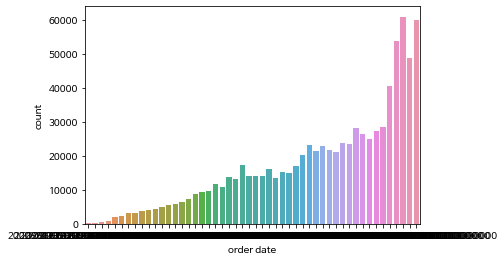

In [ ]:
#주문일자
order_date = file.groupby('주문일자')['주문일자'].count()
order_date= pd.DataFrame(order_date).rename(columns = {'주문일자':'count'}).reset_index()

# plt.figure(figsize= (20,10))
sns.barplot(data=order_date, x= '주문일자',y = 'count')
# plt.xticks(ticks = np.arange(0,100, 2), labels = xticks)
plt.xlabel('order date')

Text(0.5, 0, 'order time')

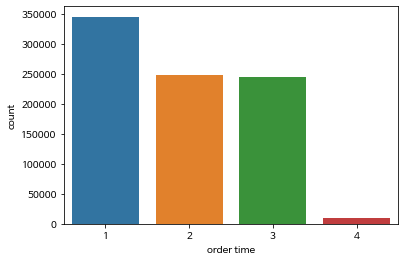

In [ ]:
#주문시간대
order_time = file.groupby('주문시간대')['주문시간대'].count()
order_time= pd.DataFrame(order_time).rename(columns = {'주문시간대':'count'}).reset_index()

sns.barplot(data=order_time, x= '주문시간대',y = 'count')
# plt.xticks(ticks = np.arange(0,100, 2), labels = xticks)
plt.xlabel('order time')

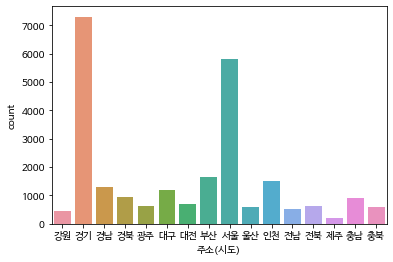

In [ ]:
#주소
address = file.groupby('주소(시도)')['고객구분코드'].nunique()
address= pd.DataFrame(address).rename(columns = {'고객구분코드':'count'}).reset_index()
address
sns.barplot(data=address, x= '주소(시도)',y = 'count')
plt.rc('font', family='NanumBarunGothic') 


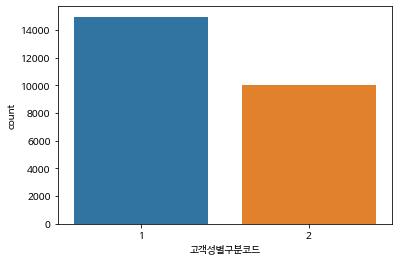

In [ ]:
#성별
gender = file.groupby('고객성별구분코드')['고객구분코드'].nunique()
gender= pd.DataFrame(gender).rename(columns = {'고객구분코드':'count'}).reset_index()
sns.barplot(data=gender, x= '고객성별구분코드',y = 'count')
 


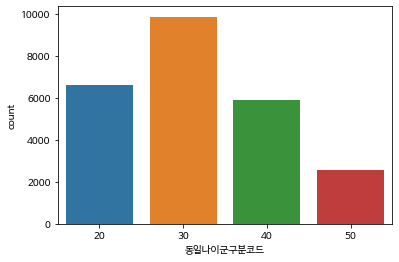

In [ ]:
#나이
age = file.groupby('동일나이군구분코드')['고객구분코드'].nunique()
age= pd.DataFrame(age).rename(columns = {'고객구분코드':'count'}).reset_index()
sns.barplot(data=age, x= '동일나이군구분코드',y = 'count')
 

Text(0.5, 0, '하한가여부')

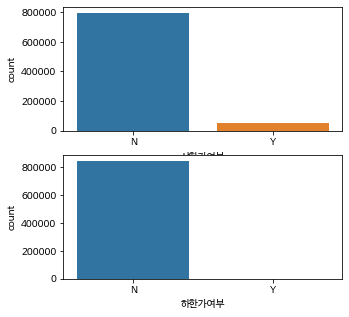

In [ ]:
#상한가여부
plt.figure(figsize=(5,5))
plt.subplot(2,1,1)
upper_limit = file.groupby('상한가여부')['상한가여부'].count()
upper_limit= pd.DataFrame(upper_limit).rename(columns = {'상한가여부':'count'}).reset_index()

sns.barplot(data=upper_limit, x= '상한가여부',y = 'count')
plt.xlabel('상한가여부')

#하한가여부
plt.subplot(2,1,2)
low_limit = file.groupby('하한가여부')['하한가여부'].count()
low_limit= pd.DataFrame(low_limit).rename(columns = {'하한가여부':'count'}).reset_index()

sns.barplot(data=low_limit, x= '하한가여부',y = 'count')
plt.xlabel('하한가여부')


Text(0.5, 0, '거래소구분코드')

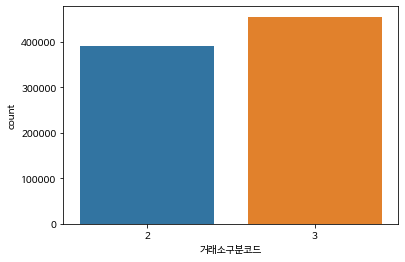

In [ ]:
#거래소구분코드
board = file.groupby('거래소구분코드')['거래소구분코드'].count()
board= pd.DataFrame(board).rename(columns = {'거래소구분코드':'count'}).reset_index()
sns.barplot(data=board, x= '거래소구분코드',y = 'count')
plt.xlabel('거래소구분코드')


Text(0.5, 0, '상품명')

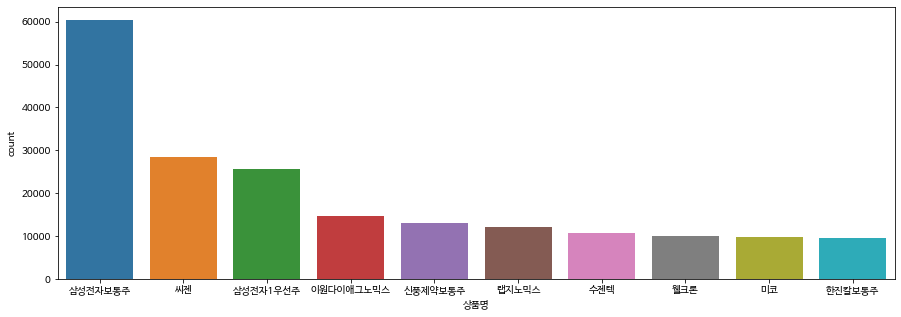

In [ ]:
#주식 거래횟수 상위 10개
plt.figure(figsize=(15,5))
stock = file.groupby('상품명')['상품명'].count().sort_values(ascending = False)[:10]
stock= pd.DataFrame(stock).rename(columns = {'상품명':'count'}).reset_index()
sns.barplot(data=stock, x= '상품명',y = 'count')
plt.xlabel('상품명')

(array([2.4988e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.0000000e+00, 6.6808980e+05, 1.3361786e+06, 2.0042674e+06,
        2.6723562e+06, 3.3404450e+06, 4.0085338e+06, 4.6766226e+06,
        5.3447114e+06, 6.0128002e+06, 6.6808890e+06]),
 <a list of 10 Patch objects>)

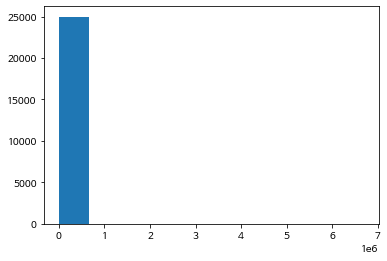

In [ ]:
#총체결수량
from sklearn.preprocessing import RobustScaler
robuster_scaler = RobustScaler()
amount = file.groupby('고객구분코드')['총체결수량'].sum()
amount= pd.DataFrame(amount).rename(columns = {'총체결수량':'sum'}).reset_index()
# sns.barplot(data=amount, x= '총체결수량',y = 'count')
plt.hist(amount['sum'])